# 1. `kormaps2014`설치

1. 커맨드에가서 `sudo ln -s /bin/tar /bin/gtar`를 친다. 이걸 쳐야지 Rstudio에서 `devtools::install_github()`함수가 잘 실행된다. 
2. Rstudio에 가서 `devtools::install_github("cardiomoon/kormaps2014")`를 친다. 

***2의단계에 앞서 `install.packages("stringi")`를 실행해야 `devtools::install_github("cardiomoon/kormaps2014")`가 실행된다고 주장하는 사람도 있음. 나는 그냥 해도되는거같음. 오히려 나는 `install.packages("mapproj")`를 실행해야 했음.*** 

In [1]:
library(kormaps2014)

# 2. 패키지 내부탐색: `areacode`, `kormap1` 데이터프레임 살펴보기 

패키지를 설치하면 몇가지 데이터들이 알아서 로드된다. 우리가 사용하는 것은 `areacode`, `kormap1` 이다. 

In [2]:
areacode

code,name,name1
<int>,<fct>,<fct>
11,서울특별시,서울
21,부산광역시,부산
22,대구광역시,대구
23,인천광역시,인천
24,광주광역시,광주
25,대전광역시,대전
26,울산광역시,울산
29,세종특별자치시,세종
31,경기도,경기


In [3]:
str(kormap1)

'data.frame':	8831 obs. of  15 variables:
 $ id       : chr  "0" "0" "0" "0" ...
 $ long     : num  138 138 138 138 138 ...
 $ lat      : num  50.7 50.7 50.7 50.7 50.7 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ hole     : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ piece    : Factor w/ 113 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ group    : Factor w/ 205 levels "0.1","1.1","1.2",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ SP_ID    : Factor w/ 17 levels "0","1","10","11",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ SIDO_CD  : Factor w/ 17 levels "11","21","22",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ SIDO_NM  : Factor w/ 17 levels "\xb0\xad\xbf\xf8\xb5\xb5",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ BASE_YEAR: Factor w/ 1 level "2014": 1 1 1 1 1 1 1 1 1 1 ...
 $ name     : Factor w/ 17 levels "강원도","경기도",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ name1    : Factor w/ 17 levels "\xb0\xad\xbf\xf8\xb5\xb5",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ region   : Factor w/ 17 levels "11","21","22",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ code     : 

***`kormap1`을 살펴봐도 먼소린지 모르겠지만 하여튼 이게 있어야 지도가 그려진다.***

# 3. `areacode` -> `newdf` 

In [4]:
head(areacode)

,code,name,name1
,<int>,<fct>,<fct>
1,11,서울특별시,서울
2,21,부산광역시,부산
3,22,대구광역시,대구
4,23,인천광역시,인천
5,24,광주광역시,광주
6,25,대전광역시,대전


`areacode`데이터 프레임에서 `code`, `name`열을 추출하고 내가 시각화하고 싶은 데이터 `pop`열을 합쳐 새로운 데이터 프레임 `newdf`를 만든다. 

`pop`데이터는 그냥 대충 `runif()`를 통해서 추출한 값으로 채워넣음. 

In [5]:
pop<-runif(17) # 17은 광역단체수 
newdf<-cbind(areacode[1:2],pop)
newdf

code,name,pop
<int>,<fct>,<dbl>
11,서울특별시,0.56228786
21,부산광역시,0.17466976
22,대구광역시,0.54708891
23,인천광역시,0.72824175
24,광주광역시,0.06400674
25,대전광역시,0.53070275
26,울산광역시,0.95287530
29,세종특별자치시,0.10591852
31,경기도,0.24607106


# 4. 이제 `newdf`와 `kormap1` 두개의 데이터 프레임을 이용하여 그림을 그리자. 

나는 이단계에서 `install.packages("mapproj")`를 먼저 실행했다. 이걸 깔아야지 에러없이 그려졌음. 

그리는 단계에서 `newdf`와 `kormap1` 두개의 데이터 프레임을 사용한다. 

In [20]:
#install.packages("mapproj")
library(ggplot2)
p <-ggplot(newdf,aes(map_id=code,alpha=pop))+
    geom_map(map=kormap1,colour="grey80",size=0.2)+
    expand_limits(x=kormap1$long,y=kormap1$lat)+
    ggtitle("지도그리는 예제")+
    coord_map()+theme_void()+guides(fill=FALSE)+guides(alpha=FALSE)+
    theme(plot.title=element_text(face="bold.italic",hjust=0.5,size=rel(1.5)))

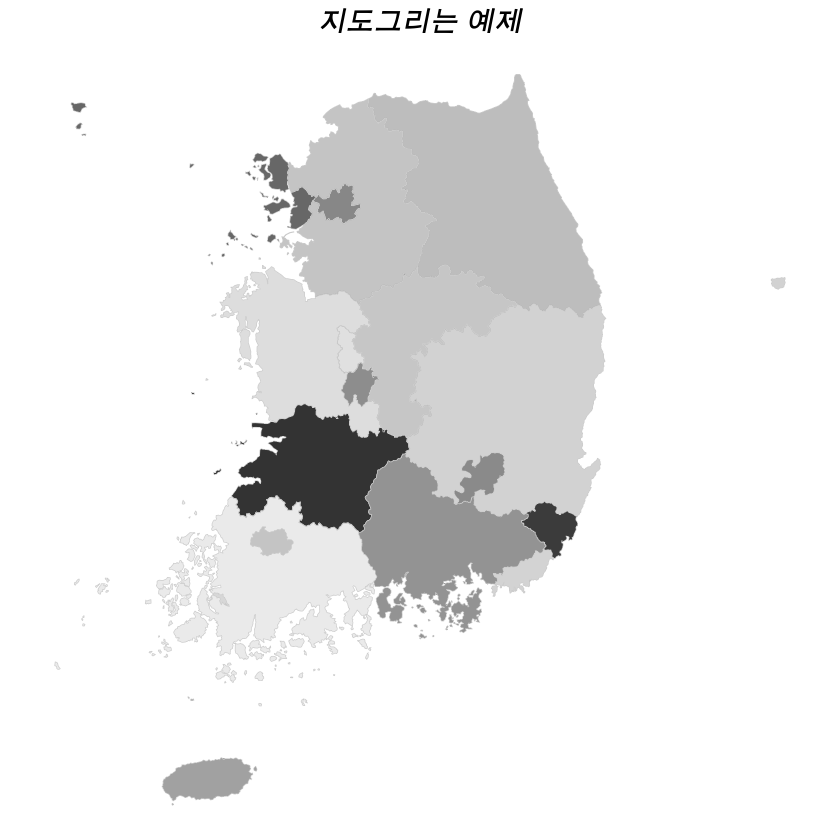

In [21]:
p